### 목표
    - 붓꽃의 꽃잎 길이, 너비/ 꽃받침 길이, 너비 특징 4개를 활용하여 3가지의 붓꽃품종을 분류해보자
    - knn모델의 이웃의 수를 조정해보자(n_neighbors개수를 조정, k의 개수를 조정, k ==n_neighbors): 하이퍼 파라미터 튜닝

In [55]:
# 환경
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 머신러닝
from sklearn.neighbors import KNeighborsClassifier  #분류
from sklearn.metrics import accuracy_score  #평가
#train,test set 분리
from sklearn.model_selection import train_test_split   

# 데이터 불러오기
from sklearn.datasets import load_iris #붓꽃데이터 가져오기


In [56]:
# iris 데이터 열어 확인
iris_data = load_iris()
iris_data   # 딕셔너리 형식으로 데이터가 담김 -> sklearn.datasets
# 번처(bunch)객치

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [57]:
# 딕셔너리 key값만 확인
# items(), values(), keys()
iris_data.keys()
# data : X, 문제, 독립변수, 설명변수, 특성, feature
# target : y, 답, 종속변수, 반응변수, label, 라벨
# - 분류용 답 : 카테고리 label, class label
# feature_names : 특성의 이름들
# target_names : 답데이터 이름들
# DESCR : 기술통계, 데이터 정보(크기, 상관관계, 출처)
# 필수적 입력 데이터 : data, target
# 옵션 데이터 : feature_names, target_names, DESCR, frame, filename....


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [58]:
# 문제 데이터 살펴보기

# 키 data 값만 가져오는 방법 두가지 iris_data['data'], iris_data.data
# iris_data['data']
print(iris_data.data)
print(iris_data.data.shape) # 크기
print(iris_data.data.dtype) # data타입
print(iris_data.data.ndim) # 차원


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [59]:
# 문제 데이터
iris_data.data[0:5] # 5개 행 출력



array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [60]:
# 특성의 이름 확인하기
iris_data.feature_names

# sepal length (cm) : 꽃받침 길이
# sepal width (cm) : 꽃받침 너비
# petal length (cm) : 꽃잎 길이
# petal width (cm) : 꽃잎 너비
# 총 4개의 특성으로 붓꽃 품종을 분류해보는 상황

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [61]:
# 답 데이터 살펴보기

iris_data.target
# 클래스(카테고리) class : 3개

# 1. 섞기 2.분할 7:3 -> train_test_split


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
# 품종이름
iris_data.target_names
# setosa -0
# versicolor -1
# virginica -2


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [63]:
# DESCR : 기술통계량 확인

print(iris_data.DESCR)

# Class Correlation 클래스와  상관관계
# -1~1 표현되는 상관계수
# -1, +1 가까울수록 상관이 어느정도 높음
#  0가까울 수록 상관관계가 덜함(적음)
# (high!) : petal width, petal length 2개의 컬럼이
# 3가지 품종을 분휴하는데 도움을 주고 있음, 유의미한 컬럼


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 데이터셋 구성
    - numpy -> 특성데이터(피처, 문제)만 df 변경
    - X, y
    - traub_test_split도구를 활용해서 train set, test set구성

In [64]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2


In [65]:
# 문제와 답변수 정리
X = iris_df
y = iris_data.target
# 데이터의 균형 - 다양성이 나름대로 유지가 된 데이터
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [75]:
# 훈련 세트
# 테스트 세트
# train_test_split 도구 활용 - 섞고 분리(램덤 샘플링)
# 7:3(train 70%, test 30%)
# random_state = 3 (랜덤하게 섞는 기준을 고정하는 것)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3)



# 4개 변수 크기
print('훈련 데이터셋 크기 : ', X_train.shape, y_train.shape)
print('테스트 데이터셋 크기 : ', X_test.shape, y_test.shape)



훈련 데이터셋 크기 :  (105, 4) (105,)
테스트 데이터셋 크기 :  (45, 4) (45,)


In [81]:
# 데이터의 다양성 유지되고 있는지 확인
# y_train의 카테고리별 개수 확인
# np.unipue(대상, return_counts =True) : 중복없이 값을 확인하는 함수
# return_counts = True 각각의 카테코리가 몇개씩인지 알려줌
np.unique(y_train,return_counts=True)
np.unique(y_train,return_counts=True)[1]/105
# 7:3 클래스(카테고리) 별 다양성이 나름대로 유지가 되고 있음


array([0.31428571, 0.34285714, 0.34285714])

### 탐색적 데이터 분석(eda)
    - 산점도 행렬(scatterplot matrix) : 한꺼번에 변수간의 특성 간의 관계를 일목요연하게 보기 가능
    - 각 특성을 결합하여 3가지 붓꽃 품종이 잘 분리가 되는 특성이 있는지 확인해보자

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

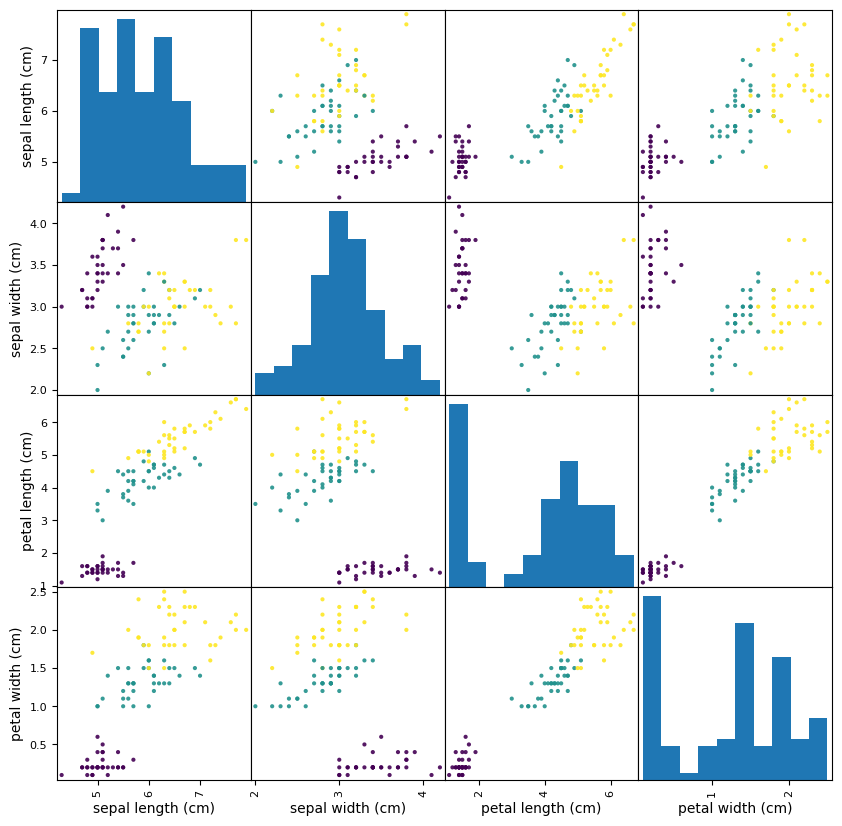

In [82]:
pd.plotting.scatter_matrix(X_train, # 문제데이터(좌표)
                           figsize=(10,10), #그래프 크기
                           c = y_train, #클래스별 색상
                           alpha=0.9)   # 그래프 산점도 점 투명도
plt.show()
# 같은 색상의 점끼리 뭉쳐있고, 다른 색상과는 위치적으로 구별된다면 해당 특성의 결합이
# 붓꽃 품종을 분류하는데 의미가 있는 것
# 꽃잎의 길이, 너비 특성이 붓꽃 품종을 분류한느데 의미가 있어 보임



### 모델링


In [96]:
# 모델 객체 생성
# 이웃의 수 5
# 모델명 iris_rnn_model

iris_knn_model = KNeighborsClassifier(n_neighbors=5)



In [97]:
# 모델 학습
# fit(훈련문제, 훈련답)
iris_knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [102]:
# 모델 예측
# predict(테스트 문제)
# knn 거리 계산 - 유클리디안 거리 공식

pre = iris_knn_model.predict(X_test)
pre # 인덱스 번호
print(' - 테스트셋 전체를 이용한 예측 결과 : \n', pre)
iris_data.target_names[pre]
print(' - 예상되는 품종, ', iris_data.target_names[pre])

 - 테스트셋 전체를 이용한 예측 결과 : 
 [0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]
 - 예상되는 품종,  ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']


In [99]:
# 정확도 측정
# k = 5 (이웃의 수)
# accuracy_score(실제답, 예측값)
accuracy_score(y_test,pre)  # 95.5%

#신뢰할 수 있을까?

0.9555555555555556

### 하이퍼 파라미터 조정
    - knn에서는 이웃의 수 (k, n_neighbors)값을 의미
    - for문을 돌리면서 k값을 바꾸고 해당시점의 train acc, test acc를 빈리스트에 저장
    - 그 후에 선 그래프로 복잡도 곡선을 그려보자

In [103]:
X_train.shape

(105, 4)

In [113]:
# 1~train 행 개수 만큼 k값을 설정 가능함
# 1~80까지 k범위 설정
k_range = range(1,81) # 이웃의 수 범위
# train, test 정확도를 담을 빈 리스트
train_acc_lst = []
test_acc_lst = []
for k in k_range:
    # knn 모델 생성
    model = KNeighborsClassifier(n_neighbors=k)
    
    # knn 모델 학습 (X_train)
    model.fit(X_train, y_train)
    
    # knn 모델 예측 (X_train, X_test)
    X_train_pre = model.predict(X_train) 
    X_test_pre = model.predict(X_test)
    
    # knn 모델 정확도 accuracy_score(X_train_pre, X_test_pre)
    X_train_acc = accuracy_score(y_train,X_train_pre)
    X_test_acc = accuracy_score(y_test,X_test_pre)
    
    # 빈리스트들에 추가하기
    train_acc_lst.append(X_train_acc)
    test_acc_lst.append(X_test_acc)

    


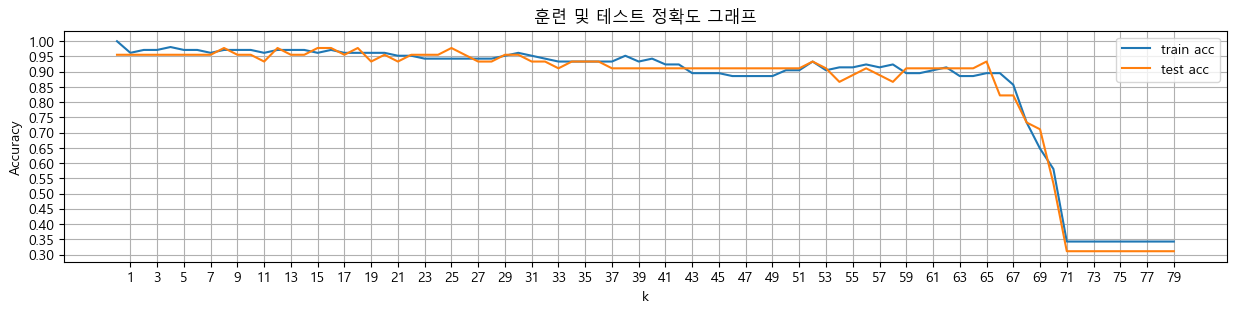

In [125]:
# 선그래프
#
# plt.plot()

from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:\Windows\Fonts\malgun.ttf"

font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family= font_name)

plt.figure(figsize=(15,3))

plt.plot(train_acc_lst, label='train acc')
plt.plot(test_acc_lst, label='test acc')

# 범례 추가
plt.legend()

# x축의 단위를 1부터 80까지 1씩 증가하도록 설정
plt.xticks(np.arange(1, 81, step=2))

# y축의 단위를 0.88부터 1까지 0.02씩 증가하도록 설정
plt.yticks(np.arange(0.3, 1.02, step=0.05))

# 그래프 제목과 축 레이블 추가 (필요에 따라 제목과 레이블을 수정)
plt.title('훈련 및 테스트 정확도 그래프')
plt.xlabel('k')
plt.ylabel('Accuracy')

#눈금선
plt.grid()

# 그래프 표시
plt.show()

# 파란색 => train 정확도 1- 100%
# 주황색 => test 정확도 1-92%
# train 100%해서 test 100% 아닌 현상을 기억 => 과대적합 현상일 수 있음 
# k값이 커질수록 과소 적합현상으로 가고 있음
# 모델의 하이퍼 파라미터를 변경할 필요X
# 해당 모델이 일반화된 (최적의 선을을 내는) 모델이다 정의?
